In [175]:
import pandas as pd
import numpy as np
import xgboost as xgb

from delai.data.local_disk import get_pandas_chunk
from delai.ml_logic.preprocessing import preprocess_X, preprocess_y

from sklearn.metrics import classification_report, accuracy_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn import datasets
from sklearn import tree
from xgboost import XGBClassifier

from matplotlib import pyplot as plt

## Import CSV & create X / y datasets

In [176]:
df_X = pd.read_csv('../raw_data/train_100k.csv')
df_y = pd.read_csv('../raw_data/train_100k.csv')

In [177]:
df_X = df_X.drop(columns=["ArrDelayMinutes" , "Cancelled", "Diverted"], axis =1)
df_y = df_y.drop(df_y.iloc[:, 1:22],axis = 1)

In [178]:
df_X.head()


,Unnamed: 0,FlightDate,Year,Quarter,Month,DayofMonth,DayOfWeek,Airline,Operating_Airline,Marketing_Airline_Network,...,Dest,CRSDepTime,OriginAirportID,OriginCityName,OriginStateName,DestAirportID,DestCityName,DestStateName,CRSArrTime,Distance
0,4324343,7/20/2018,2018,3,7,20,5,Southwest Airlines Co.,WN,WN,...,DAL,1200,12889,"Las Vegas, NV",Nevada,11259,"Dallas, TX",Texas,1640,1067
1,28169346,1/2/2022,2022,1,1,2,7,Spirit Air Lines,NK,NK,...,MSY,2110,15304,"Tampa, FL",Florida,13495,"New Orleans, LA",Louisiana,2148,488
2,18078508,2/11/2020,2020,1,2,11,2,Air Wisconsin Airlines Corp,ZW,UA,...,ORF,930,13930,"Chicago, IL",Illinois,13931,"Norfolk, VA",Virginia,1245,717
3,23669089,2/10/2021,2021,1,2,10,3,United Air Lines Inc.,UA,UA,...,IAH,700,15304,"Tampa, FL",Florida,12266,"Houston, TX",Texas,828,787
4,14530840,3/12/2020,2020,1,3,12,4,JetBlue Airways,B6,B6,...,BOS,1324,11278,"Washington, DC",Virginia,10721,"Boston, MA",Massachusetts,1455,399


In [179]:
df_y.head()

,Unnamed: 0,ArrDelayMinutes,Cancelled,Diverted
0,4324343,0.0,False,False
1,28169346,2.0,False,False
2,18078508,0.0,False,False
3,23669089,0.0,False,False
4,14530840,0.0,False,False


## Preprocess data

In [180]:
X = preprocess_X(df_X[:25000])

✅ preprocess_X() done


In [181]:
y = preprocess_y(df_y[:25000])

✅ BINARY preprocess_y() done


/home/tamara/code/sameriliya/delai/delai/ml_logic/preprocessing.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y["DelayGroup"] = None


In [182]:
np.unique(y, return_counts=True)

(array([0, 1]), array([ 3365, 21635]))

In [183]:
#X = X.drop(columns=[680], axis =)
X = X.dropna()

## t_t_s & inspect


In [184]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state = 1)

In [185]:
X.shape

(25000, 752)

In [186]:
y.shape

(25000,)

## DecisionTreeClassifier

In [232]:
clf = DecisionTreeClassifier(max_depth=None, min_samples_leaf=60, random_state=None, splitter='best', min_samples_split=40)
clf.fit(X_train,y_train)
pred = clf.predict(X_test)


In [233]:
pred

array([1, 1, 1, ..., 1, 1, 1])

In [234]:

print("Accuracy of Model::",accuracy_score(y_test,pred))

Accuracy of Model:: 0.8676


In [235]:
score = classification_report(y_test, pred)
print('Classification Report:',)
print (score)

Classification Report:
              precision    recall  f1-score   support

           0       0.31      0.01      0.01       657
           1       0.87      1.00      0.93      4343

    accuracy                           0.87      5000
   macro avg       0.59      0.50      0.47      5000
weighted avg       0.80      0.87      0.81      5000



In [236]:
np.unique(pred)

array([0, 1])

In [237]:
np.unique(y_test)

array([0, 1])

In [238]:
print(pred[:20])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [239]:
cross_val_score(clf, X_train, y_train, scoring = 'accuracy', cv=5)

array([0.86275, 0.86475, 0.8645 , 0.8645 , 0.864  ])

## XGBoost

In [211]:
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

In [212]:
xgb_classifier.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [213]:
predictions = xgb_classifier.predict(X_test)

In [214]:
predictions

array([1, 1, 1, ..., 1, 1, 1])

In [215]:
print("Accuracy of Model::",accuracy_score(y_test,predictions))

Accuracy of Model:: 0.8652


[Text(0.6447226459317683, 0.9772727272727273, 'X[751] <= -0.004\ngini = 0.234\nsamples = 20000\nvalue = [2708, 17292]'),
 Text(0.37064250902191304, 0.9318181818181818, 'X[744] <= -0.25\ngini = 0.194\nsamples = 12996\nvalue = [1417, 11579]'),
 Text(0.15567915473045874, 0.8863636363636364, 'X[736] <= 0.5\ngini = 0.158\nsamples = 5263\nvalue = [455, 4808]'),
 Text(0.07057554224487518, 0.8409090909090909, 'X[748] <= -0.526\ngini = 0.174\nsamples = 4344\nvalue = [418, 3926]'),
 Text(0.028572491536143458, 0.7954545454545454, 'X[745] <= -0.25\ngini = 0.259\nsamples = 693\nvalue = [106, 587]'),
 Text(0.019048327690762305, 0.75, 'X[8] <= 0.5\ngini = 0.324\nsamples = 290\nvalue = [59, 231]'),
 Text(0.014286245768071729, 0.7045454545454546, 'X[748] <= -0.719\ngini = 0.278\nsamples = 228\nvalue = [38, 190]'),
 Text(0.009524163845381153, 0.6590909090909091, 'X[750] <= -0.981\ngini = 0.23\nsamples = 128\nvalue = [17, 111]'),
 Text(0.004762081922690576, 0.6136363636363636, 'gini = 0.296\nsamples = 61

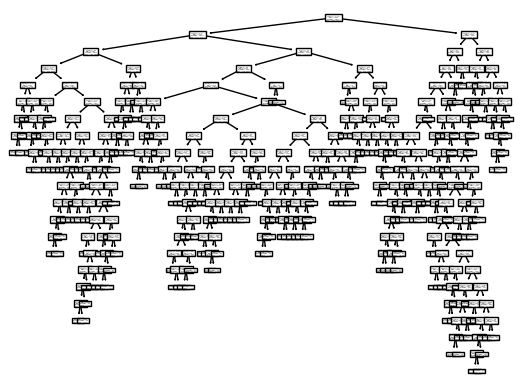

In [240]:
tree.plot_tree(clf)

In [ ]:
clf.get_depth()

In [ ]:
clf.get_n_leaves()

In [ ]:
#tree.get_params(deep=True)

In [ ]:
clf.predict(X, check_input=True)

In [ ]:
clf.predict_proba(X, check_input=True)

## Diagrams